In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [11]:
n=400
data = {
    'patient_id':np.arange(1,n+1),
    'age':np.random.randint(20,60,n),
    'gender':np.random.choice(['Male','Female'],n),
    "diagnosis": np.random.choice(
        ["Cardiology", "Neurology", "Orthopedics", "General Medicine", "Pediatrics"], n),
    'hospital_days':np.random.randint(3,15,n),
    'treatment_cost':np.random.randint(1000,50000,n)
}

In [12]:
df = pd.DataFrame(data)
df

,patient_id,age,gender,diagnosis,hospital_days,treatment_cost
0,1,20,Female,Pediatrics,14,21409
1,2,48,Female,General Medicine,12,12110
2,3,27,Female,Pediatrics,14,7073
3,4,23,Male,Neurology,10,36310
4,5,54,Female,Cardiology,7,16282
...,...,...,...,...,...,...
395,396,22,Male,Orthopedics,4,17251
396,397,23,Male,Neurology,6,20252
397,398,45,Male,Orthopedics,13,11707
398,399,30,Female,Orthopedics,3,35206


In [13]:
avg_days = (df.groupby('diagnosis')['hospital_days'].mean())
avg_days

diagnosis
Cardiology          8.410256
General Medicine    8.903226
Neurology           8.329114
Orthopedics         8.432432
Pediatrics          7.986842
Name: hospital_days, dtype: float64

In [14]:
age_bins = [0,18,35,60,np.inf]
age_labels = ['child','young','adult','senior']


df['age_group'] = pd.cut(df['age'],bins=age_bins,labels=age_labels)
df['age_group'].value_counts()

age_group
adult     242
young     158
child       0
senior      0
Name: count, dtype: int64

In [15]:
costs = df["treatment_cost"].values

mean_cost = np.mean(costs)
std_cost = np.std(costs)

z_scores = (costs - mean_cost) / std_cost
cost_anomalies = np.abs(z_scores) > 3

np.sum(cost_anomalies)

np.int64(0)

In [16]:
df["log_treatment_cost"] = np.log1p(df["treatment_cost"])

df[["treatment_cost", "log_treatment_cost"]].head()


,treatment_cost,log_treatment_cost
0,21409,9.971613
1,12110,9.401869
2,7073,8.864181
3,36310,10.499876
4,16282,9.697877


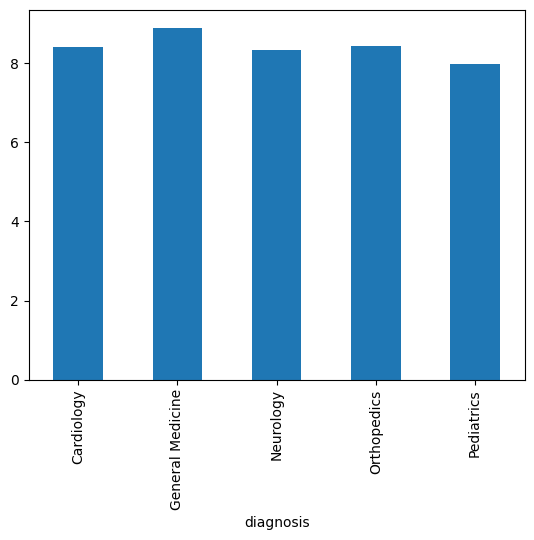

In [25]:
avg_days.plot(kind="bar")
plt.xlabel="Diagnosis"
plt.ylabel="Average Hospital Days"
plt.title="Average Hospital Stay by Diagnosis"
plt.show()


C:\Users\dhira\AppData\Local\Temp\ipykernel_30000\1361491834.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["treatment_cost"]


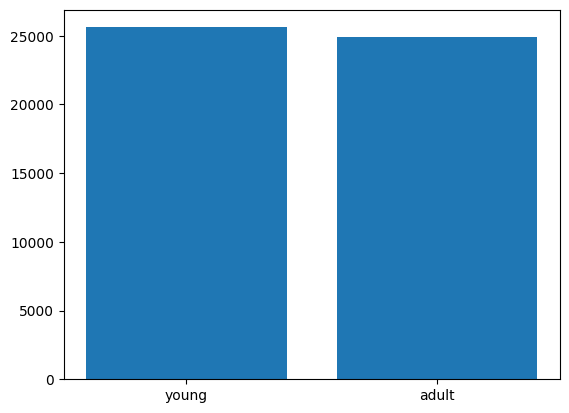

In [27]:
avg_cost_by_age = (
    df.groupby("age_group")["treatment_cost"]
      .mean()
)

plt.bar(avg_cost_by_age.index, avg_cost_by_age.values)
plt.xlabel="Age Group"
plt.ylabel="Average Treatment Cost"
plt.title="Average Treatment Cost by Age Group"
plt.show()